In [32]:
#importing important modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from datetime import date # getting date from datetime module

In [33]:
#loading the dataset
data = pd.read_csv(r'C:\Users\Rishabh Gupta\Downloads\ANZ_txn.csv')

In [34]:
data.shape
# there are 12043 sample points with 23 features

(12043, 23)

In [35]:
data.info()
# most of the features of object type (may be due to categorcal nature)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status             12043 non-null  object 
 1   card_present_flag  7717 non-null   float64
 2   bpay_biller_code   885 non-null    object 
 3   account            12043 non-null  object 
 4   currency           12043 non-null  object 
 5   long_lat           12043 non-null  object 
 6   txn_description    12043 non-null  object 
 7   merchant_id        7717 non-null   object 
 8   merchant_code      883 non-null    float64
 9   first_name         12043 non-null  object 
 10  balance            12043 non-null  float64
 11  date               12043 non-null  object 
 12  gender             12043 non-null  object 
 13  age                12043 non-null  int64  
 14  merchant_suburb    7717 non-null   object 
 15  merchant_state     7717 non-null   object 
 16  extraction         120

In [36]:
#peeking at the data
pd.set_option('display.max.columns',25) #getting information about the columns of the data
data.head(10)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,8/1/2018,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,8/1/2018,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,8/1/2018,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,8/1/2018,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,8/1/2018,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit
5,posted,NaN,NaN,ACC-1608363396,AUD,151.22 -33.87,PAYMENT,NaN,NaN,Robert,1705.43,8/1/2018,M,20,NaN,NaN,2018-08-01T02:00:00.000+0000,163.00,1005b48a6eda4ffd85e9b649dc9467d3,Australia,CUS-2688605418,NaN,debit
6,authorized,1.0,NaN,ACC-2776252858,AUD,144.95 -37.76,SALES-POS,3aa18033-a0a9-4190-a117-b7caaf4d07e3,NaN,Kristin,1248.36,8/1/2018,F,43,Kalkallo,VIC,2018-08-01T02:23:04.000+0000,61.06,b79ca208099c4c28aa5dae966096d842,Australia,CUS-4123612273,144.95 -37.53,debit
7,authorized,1.0,NaN,ACC-2776252858,AUD,144.95 -37.76,POS,ee58145d-26e8-4b01-9cd9-62378014f21d,NaN,Kristin,1232.75,8/1/2018,F,43,Melbourne,VIC,2018-08-01T04:11:25.000+0000,15.61,e1c4a50d6a0549cbb3710a62a2fa00d5,Australia,CUS-4123612273,144.96 -37.81,debit
8,authorized,1.0,NaN,ACC-182446574,AUD,116.06 -32.00,POS,cfbf535e-caa8-499f-9d41-bbdc2b836d85,NaN,Tonya,213.16,8/1/2018,F,27,Yokine,WA,2018-08-01T04:40:00.000+0000,19.25,799e39eb2c1b411185424b0f2cd18bda,Australia,CUS-3026014945,115.85 -31.9,debit
9,posted,NaN,NaN,ACC-602667573,AUD,151.23 -33.96,INTER BANK,NaN,NaN,Michael,466.58,8/1/2018,M,40,NaN,NaN,2018-08-01T06:00:00.000+0000,21.00,798a77869014441b840a7a8a23408332,Australia,CUS-2031327464,NaN,debit


## Interpretation:
The given data shows the details of the transactions such as transaction nature, consumer details and merchant details.

From the given subset of the data, one can see that there are presence of null value in some of the columns ,especially merchant code.

In [37]:
#presence of null values
data.isnull().sum()*100/ len(data)
# Only 6 out of 23 features have null values

status                0.000000
card_present_flag    35.921282
bpay_biller_code     92.651333
account               0.000000
currency              0.000000
long_lat              0.000000
txn_description       0.000000
merchant_id          35.921282
merchant_code        92.667940
first_name            0.000000
balance               0.000000
date                  0.000000
gender                0.000000
age                   0.000000
merchant_suburb      35.921282
merchant_state       35.921282
extraction            0.000000
amount                0.000000
transaction_id        0.000000
country               0.000000
customer_id           0.000000
merchant_long_lat    35.921282
movement              0.000000
dtype: float64

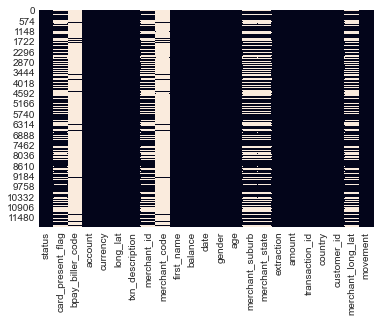

In [38]:
# In visualization form,
sns.heatmap(data.isnull(),cbar= False)

## Intrepretation:
a) Null/Missing values can be observed for six columns (flag, bpay_biller_code,merchant_id,merchant_code,merchant_suburb and 
merchant long_lat). 

b) Out of which, biller code and merchant code having maximum missing values.

c) Missing values are present in each part of the dataset, that is they are not just in beginning or ending.

d) On close observation, we can see that null values in  biller code and merchant code are highly correlated.

e) Similarly, other four are highly correlated as well. This means that if there is no record any one of them , we will not have any record for other three.


## Dealing with missing values:
a) Out of 6 columns, bpay_biller_code,merchant_id,merchant_code seems to have no or less role in deriving any insights about transactions (due to very their very high variance in value) . So, we do not need any cleaning for them. Rather, we will remove them for simplicity.

b) While the rest which includes merhant suburb, merchant_suburb and merchant_long_lat can be cleaned by having the most frequent value in their place. Another way would be to substitute the given missing values in the portion of given unique values.

In [39]:
#description about the statistics of the numerical data
data.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


## Intrepretation:
a) Mean of card_present flag is 0.80 , which means in 80 percent of the instances there was a case of card_present flag.

b)All customers are above 18 (that is adult).

c) In case of amount and balance, there is a vast difference between 75% value and max. This implies a presence of positive outliers. In other words, there are some customers involved in a very high balance and amount compared to the rest of the costumers.

d) on mean , people spend on average 187 dollars each time they visit the firm. While the median , that is 50% value, is 29.
So, mean is greater than median by a massive difference . Since mean isaffected by outliers, there prevails a situation of positive outliers , that is some transaction amount are quite high and different from the entire data

In [40]:
# extracting month out of date
data['month'] = pd.DatetimeIndex(data['date']).month
data['month'] = data['month'].map({8:'August',9:'September',10:'October'})

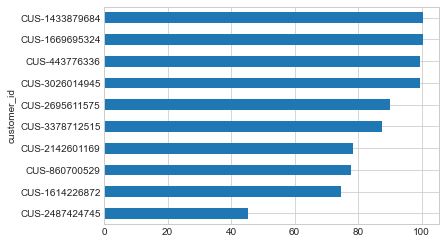

In [41]:
#purchasing volume by each consumer : we show only 10 customers having lowest purchasing volumne
data.groupby('customer_id')['amount'].mean().sort_values(ascending=True)[:10] .plot(kind='barh')

## Intrepretation:
1) There are 100 consumers.

2) Out of which the c consumers involved in less average amount of transactions: so the organisation can work on how it can improve its sales to these consumers

In [42]:
#age grouping with the help of qcut
data['agegroup']= pd.qcut(data['age'],q =4,precision =2)

In [43]:
data['agegroup'].value_counts() /  len(data)

(22.0, 28.0]     0.274516
(28.0, 38.0]     0.253342
(17.99, 22.0]    0.251765
(38.0, 78.0]     0.220377
Name: agegroup, dtype: float64


## Intrepretation:
77 percent of the consumers lying below the age of 28

Text(0.5, 1.0, 'sales to each gender')

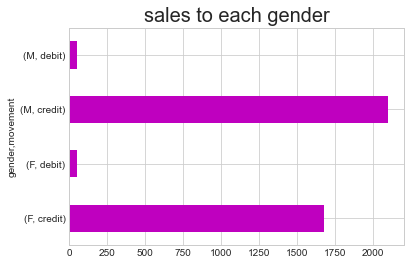

In [44]:
data.groupby(['gender','movement'])['amount'].mean().plot(kind='barh',color ='m')
plt.title('sales to each gender',fontsize =20)

## Intrepretation
On average , men have an higher amount of transaction than women. This difference is due to difference in credit purchase. That is,
men indulge in higher transactions of credit than that of women.

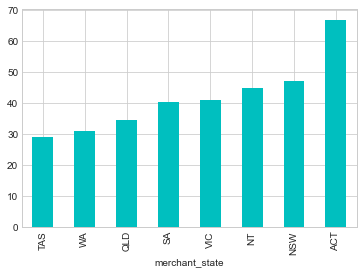

In [45]:
# state with average amount of sales
data.groupby(['merchant_state'])['amount'].mean().sort_values(ascending =True).plot(kind='bar',color ='c')

## Intrepretation:
TAS is the weakest point in terms of  average amount of sales. Whie ACT is the strongest in terms of average sales
 So, it needs to work on sales to TAS and see the reasons for its prolific performance in ACT state

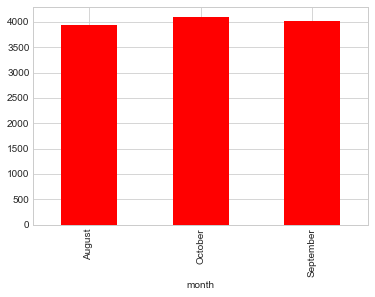

In [46]:
data.groupby('month')['amount'].count() .plot(kind='bar',color ='r')

On average transactions are 3800 each month , moreover they are quite same throughout the given three months

In [47]:
data.merchant_state.value_counts(normalize=True)

NSW    0.281068
VIC    0.276144
QLD    0.201633
WA     0.142542
SA     0.053777
NT     0.026565
ACT    0.009460
TAS    0.008812
Name: merchant_state, dtype: float64

Most of the transactions were being done in NSW and VIC, QLD and WA states.so we will look at the trasnactions in these 4 states only.

## Knowing about amount and balance:

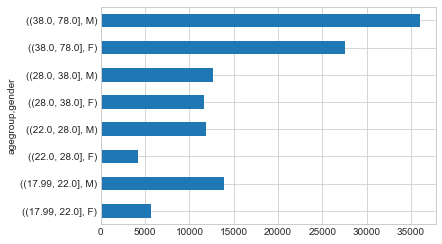

In [48]:
# mean balance across age and gender
data.groupby(['agegroup','gender'])['balance'].mean().plot(kind='barh')

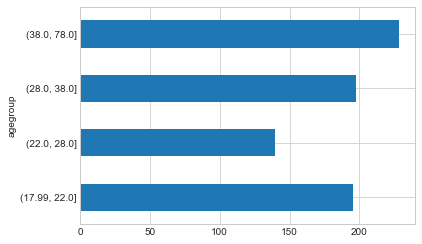

In [49]:
data.groupby('agegroup')['amount'].mean().plot(kind='barh')

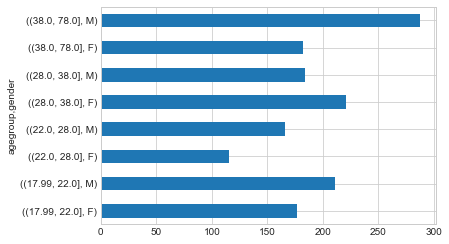

In [50]:
# average balance across age and gender
data.groupby(['agegroup','gender'])['amount'].mean().plot(kind='barh')


##   Overall Intrepretation on amount and mean balance:
1)
The average balance for the group having age between 38 and 78 have the highest mean balance. This occurs because with the age , people have higher income and credit balance. In most of the three age categories, the mean balance for female exceeds the mean balance for male.  However, there is least difference between same mean balance for both men and female belonging to the 28-38 age. While largest difference is for the age between 22-28 age group


2)The average amount spent by those in 38-78 age group is highest. People in this age group tends to have higher income due to 
experience leading to a higher average amount of transaction.
The customers in age group 22-28 spends lesser than 18-22 age group.



3) The mean balance and amount should increase with age , however in the given case, there is a sharp fall in average amount of balance and
amount as age increases from 18-22 to 22-28. So , the firm should focus on how it can increase spending by the group in the 22-28

2)  Female spent less and have less balance on average. So, the management should focus on increasing its sales for female.

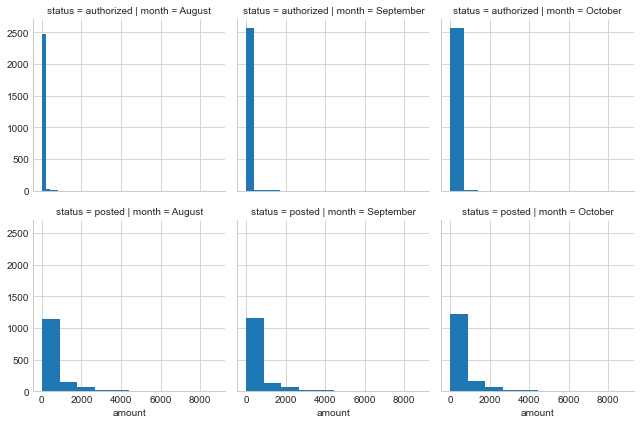

In [51]:
fun =  sns.FacetGrid(data,row ='status',col ='month')
fun.map(plt.hist,'amount')

## Intrepretation:
Posted transactions are relatively spread from 0 to 4000 across months
While authorized transactions are concentrated in the single interval of 0-1000 of amount

In [52]:
# location wise transaction
data.groupby('merchant_state')['amount'].sum()

merchant_state
ACT      4876.68
NSW    102021.77
NT       9168.89
QLD     53483.45
SA      16776.57
TAS      1962.93
VIC     87584.00
WA      33992.06
Name: amount, dtype: float64

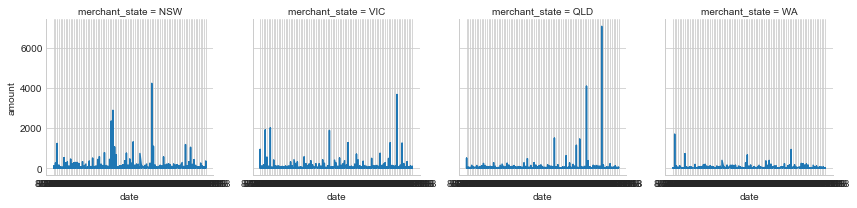

In [53]:
order = ['NSW','VIC','QLD','WA']
plot = sns.FacetGrid(data,col= 'merchant_state',col_order = order)
plot.map(plt.plot,'date','amount')

## Intrepretation:
a)In case of WA, transaction amount has been low constantly throughout the entire period of 3 months.

b) While other three states also have low amount of transactions in most of the period. But they something have quite high amount of transction (that could be a positive outlier).



In [54]:
# create new features from date
# month of the year
data['weekday']= pd.DatetimeIndex(data['date']).weekday
data['weekday'] = data['weekday'].map({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})
# week of the year
data['week'] = pd.DatetimeIndex(data['date']).week

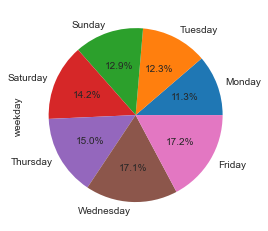

In [55]:
# number of transactins over a week
data.weekday.value_counts(normalize=True).sort_values(ascending =True).plot(kind='pie',sharey =True, autopct='%1.1f%%')

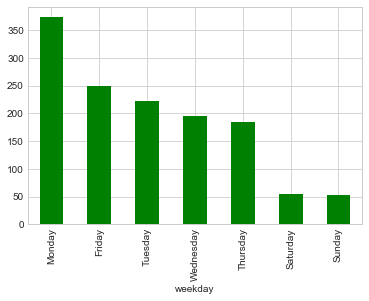

In [56]:
#transactions amount over each day
data.groupby('weekday')['amount'].mean().sort_values(ascending =False).plot(kind='bar',color ='g')

##  Intrepretation:
1) Most transactions were done on friday and wednesday while least was on monday

2 Although monday has the least number of transactions , but it has the highest average amoount of transaction. That is people spend more on monday on average.

3) If we compare weekdays with weekend, we will find that people spend relatively less on weekend than that of weekdays. So, there is a need to work on the weekend transactions.


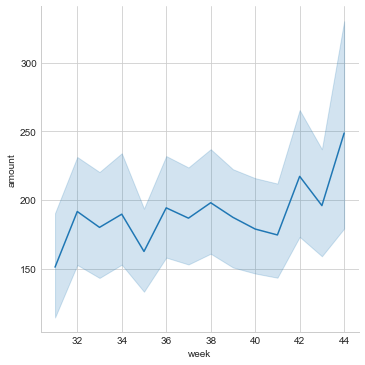

In [57]:
sns.relplot(x= 'week',y= 'amount',data= data,kind ='line') #shows average amount

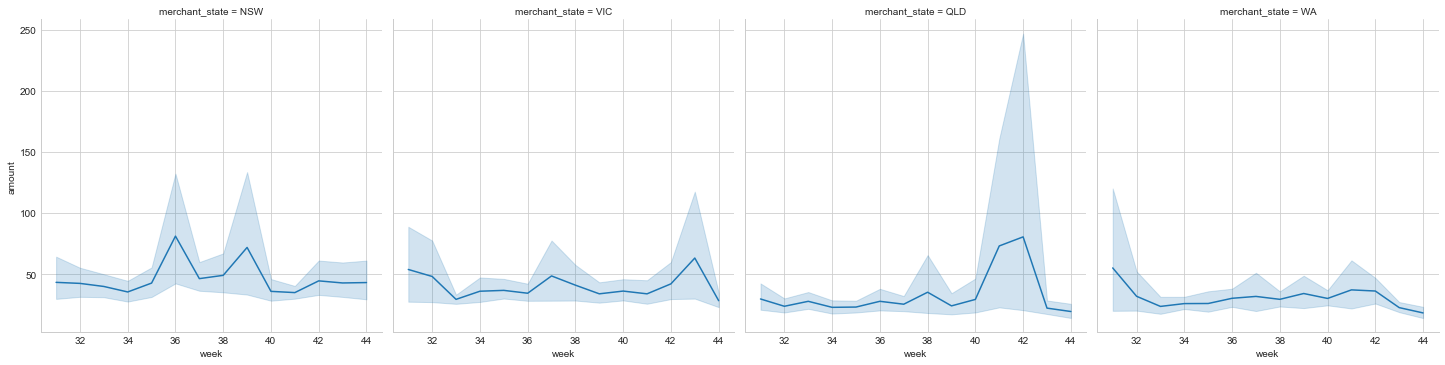

In [58]:
order = ['NSW','VIC','QLD','WA']
sns.relplot(x='week',y='amount',data=data,kind ='line',col ='merchant_state',col_order = order)

## Intrepretation:
a) Transactions amount have increased from 150 to 250 on average from the initial week to the last one.

b) In case of WA, average amount of transaction has been decreasing with time. So, the management should focus on immproving the performance in WA states.

c) There are quite high peak in some of weeks. This may have increased the average transaction amount. That, the presence of outliers may have distorted the overall analyis.

d) On observing ,we find that average transaction amount declined in the initial and end time periods for all four states


In [59]:
print(data.txn_description.value_counts(normalize =True))
torder  = ['SALES-POS','POS','PAYMENT']
#we will observe for these three transactions due to their large size

SALES-POS     0.326663
POS           0.314124
PAYMENT       0.215893
PAY/SALARY    0.073321
INTER BANK    0.061613
PHONE BANK    0.008387
Name: txn_description, dtype: float64


In [60]:
data.groupby('txn_description')['amount'].mean()

txn_description
INTER BANK      86.699461
PAY/SALARY    1898.728029
PAYMENT         77.613077
PHONE BANK     106.099010
POS             40.407412
SALES-POS       39.909789
Name: amount, dtype: float64

##  Intrepretation:
85% of transacitions below to below three transactions (SALES, POS, PAYMENT)

# Concluding insights:
a) There are 100 customers who ,on average , makes a transaction of 187 dollars.

b) On average, there is around 3800 transactions each month and they are also uniform. That is, there is not much difference  between the number of transactions done in the 3 months.

c) The 77 percent of the customers lie below the age of 28.

d) On average , men have an higher amount of transaction than women. This difference is due to difference in credit purchase. That is, men indulge in higher amount of transactions of credit than that of women.

e) TAS and WA are the weakest point in terms of  average amount of sales. Whie ACT is the strongest in terms of average sales.So, it needs to work on sales to TAS and WA and see the reasons for its prolific performance in ACT state.

f) NSW , VIC , and QLD are states where most of the transactions were taken place(around 80 %).

g) If we compare weekdays with weekend, we will find that people spend relatively less on weekend than that of weekdays. So, there is a need to work on the weekend transactions.

h) On knowing how average transaction amount changes with week, we find that ansactions amount have increased from 150 to 250 on average from the initial week to the last one. In case of WA and VIC, average amount of transaction has been decreasing with time. So, the management should focus on immproving the performance in WA states.

i)  Around 85 % of transactions were related to three types :Sales-pos , pos and Payments.However, the average amount of transaction was highest for pay /salary type (which is quite obvious as well).